# This is a Python Tutorial
Shift enter to make this a text, double click to code 

to delete a cell, esc -> d + d

Esc -> m to change code block to md

Esc -> y from md to code

To make $\LaTeX$, use dollar sign $ y = \beta_1 a+\beta_2 b + \epsilon$

In [1]:
print ("fuck you world")

fuck you world


In [2]:
x = 45-9

In [3]:
x

36

In [4]:
b = 3*2

In [5]:
x+b

42

In [6]:
import pandas as pd

In [7]:
import numpy as np

In [8]:
names2020 = pd.read_csv('LearningPython/names/yob2020.txt',names=['name', 'sex', 'births'])

In [9]:
names2020

,name,sex,births
0,Olivia,F,17535
1,Emma,F,15581
2,Ava,F,13084
3,Charlotte,F,13003
4,Sophia,F,12976
...,...,...,...
31266,Zykell,M,5
31267,Zylus,M,5
31268,Zymari,M,5
31269,Zyn,M,5


In [10]:
names2020.groupby('sex').births.sum()

sex
F    1598836
M    1706423
Name: births, dtype: int64

Trying to parse all txt into one

In [11]:
years = range(1880,2020)
pieces = []
columns = ['name','sex','births']

for year in years:
    path = 'LearningPython/names/yob%d.txt' % year
    frame = pd.read_csv(path, names = columns)
    
    frame['year'] = year
    pieces.append(frame)

In [12]:
names = pd.concat(pieces, ignore_index=True)

In [13]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1989587,Zyheem,M,5,2019
1989588,Zykel,M,5,2019
1989589,Zyking,M,5,2019
1989590,Zyn,M,5,2019


In [14]:
total_births = names.pivot_table('births', index='year', 
                                 columns='sex', aggfunc=sum)
total_births.head()


sex,F,M
year,,
1880,90994,110490
1881,91953,100738
1882,107847,113686
1883,112319,104625
1884,129019,114442


In [15]:
total_births

sex,F,M
year,,
1880,90994,110490
1881,91953,100738
1882,107847,113686
1883,112319,104625
1884,129019,114442
...,...,...
2015,1782079,1913452
2016,1768360,1893917
2017,1722140,1846154


<AxesSubplot:title={'center':'Total births by sex and year'}, xlabel='year'>

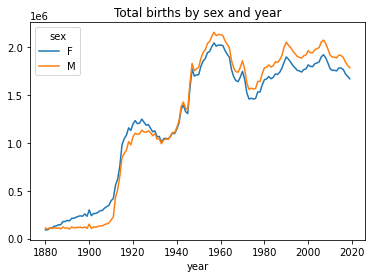

In [16]:

total_births.plot(title='Total births by sex and year')


In [17]:
def add_prop(group):
    # Integer division floors
    births = group.births.astype(float)
    group['prop'] = births / births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)

In [18]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1989587,Zyheem,M,5,2019,0.000003
1989588,Zykel,M,5,2019,0.000003
1989589,Zyking,M,5,2019,0.000003
1989590,Zyn,M,5,2019,0.000003


In [19]:
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

In [20]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1989587,Zyheem,M,5,2019,0.000003
1989588,Zykel,M,5,2019,0.000003
1989589,Zyking,M,5,2019,0.000003
1989590,Zyn,M,5,2019,0.000003


In [21]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
grouped = names.groupby(['year','sex'])
top1000 = grouped.apply(get_top1000)

top1000


name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077642
         1             Anna   F    2604  1880  0.028617
         2             Emma   F    2003  1880  0.022012
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
...                     ...  ..     ...   ...       ...
2019 M   1976505     Yadiel   M     210  2019  0.000118
         1976509      Seven   M     209  2019  0.000117
         1976510      Stone   M     209  2019  0.000117
         1976506      Aayan   M     209  2019  0.000117
         1976508       Rome   M     209  2019  0.000117

[279876 rows x 5 columns]

In [22]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']
boys

name sex  births  year      prop
year sex                                             
1880 M   942         John   M    9655  1880  0.087383
         943      William   M    9532  1880  0.086270
         944        James   M    5927  1880  0.053643
         945      Charles   M    5348  1880  0.048403
         946       George   M    5126  1880  0.046393
...                   ...  ..     ...   ...       ...
2019 M   1976505   Yadiel   M     210  2019  0.000118
         1976509    Seven   M     209  2019  0.000117
         1976510    Stone   M     209  2019  0.000117
         1976506    Aayan   M     209  2019  0.000117
         1976508     Rome   M     209  2019  0.000117

[139996 rows x 5 columns]

In [23]:
top1000.index = top1000.index.droplevel()

total_births = top1000.pivot_table('births', index='year', columns='name',
                                   aggfunc=sum)
                                   
total_births
                                   
                                   

name,Aaden,Aadhya,Aaliyah,Aanya,Aarav,Aaron,Aarush,Aayan,Ab,Abagail,...,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri,Zyaire,Zyon
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,...,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN,NaN,NaN
1881,NaN,NaN,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,...,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN,NaN,NaN
1882,NaN,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,...,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN,NaN,NaN
1883,NaN,NaN,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,...,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN,NaN,NaN
1884,NaN,NaN,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,...,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,297.0,NaN,4866.0,NaN,541.0,7166.0,211.0,NaN,NaN,NaN,...,6956.0,371.0,NaN,NaN,NaN,NaN,NaN,714.0,NaN,NaN
2016,NaN,284.0,4645.0,NaN,519.0,7166.0,NaN,NaN,NaN,NaN,...,6455.0,314.0,NaN,NaN,NaN,NaN,NaN,890.0,248.0,NaN
2017,241.0,291.0,4181.0,NaN,526.0,7208.0,NaN,NaN,NaN,NaN,...,6056.0,323.0,NaN,NaN,NaN,NaN,NaN,850.0,301.0,NaN


array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>],
      dtype=object)

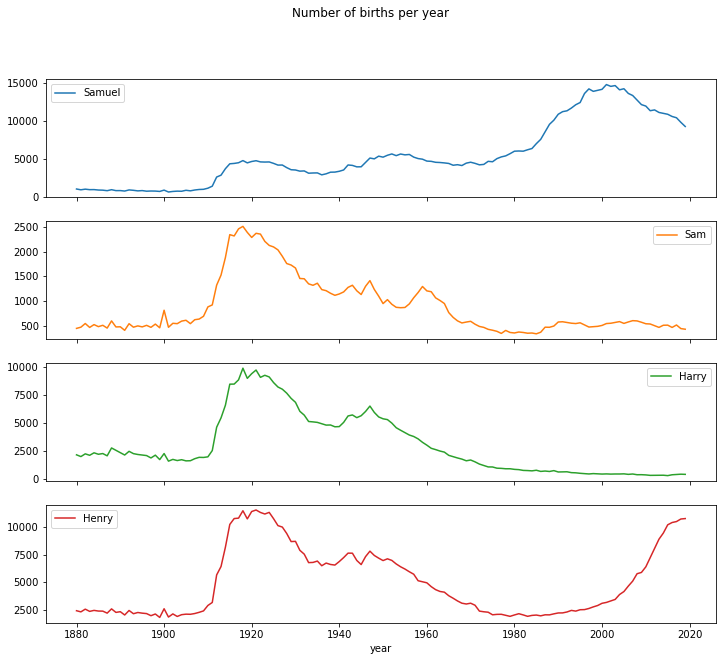

In [24]:
subset = total_births[['Samuel', 'Sam', 'Harry', 'Henry']]

subset.plot(subplots=True, figsize=(12, 10), grid=False,
            title="Number of births per year")